In [1]:


import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'



In [2]:
!ls

 clean_tweet.csv       'No_of_tweets (copy).ipynb'
 clean_tweet_rev.csv    offenseval-annotation.txt
 cnn		        offenseval-training-v1.tsv
 cnn_som	       'output_ml_with_output_file_generation_subb(1).ipynb'
 c_t.ipynb	        readme-trainingset-v1.txt
 d2v		        rnn
 hir_att	        RNN_83
 ind.txt	        sua_experimental
 labeledTrainData.tsv   SUBC


In [3]:
df = pd.read_csv("offenseval-training-v1.tsv", sep ='\t')

In [4]:
df.head()


,id,tweet,subtask_a,subtask_b,subtask_c
0,86426,@USER She should ask a few native Americans wh...,OFF,UNT,NaN
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN,IND
2,16820,Amazon is investigating Chinese employees who ...,NOT,NaN,NaN
3,62688,"@USER Someone should'veTaken"" this piece of sh...",OFF,UNT,NaN
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN,NaN


In [7]:
df.rename({'tweet':'review', 'subtask_a':'target', 'subtask_b':'subb', 'subtask_c':'subc'}, axis=1,inplace=True)


In [8]:
df.head()

,id,review,target,subb,subc
0,86426,@USER She should ask a few native Americans wh...,OFF,UNT,NaN
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,OFF,TIN,IND
2,16820,Amazon is investigating Chinese employees who ...,NOT,NaN,NaN
3,62688,"@USER Someone should'veTaken"" this piece of sh...",OFF,UNT,NaN
4,43605,@USER @USER Obama wanted liberals &amp; illega...,NOT,NaN,NaN


In [9]:
z = {'NOT' : 0 ,'OFF' : 1}
df['target'] = df.target.map(z)

In [10]:
df.head()

,id,review,target,subb,subc
0,86426,@USER She should ask a few native Americans wh...,1,UNT,NaN
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,1,TIN,IND
2,16820,Amazon is investigating Chinese employees who ...,0,NaN,NaN
3,62688,"@USER Someone should'veTaken"" this piece of sh...",1,UNT,NaN
4,43605,@USER @USER Obama wanted liberals &amp; illega...,0,NaN,NaN


In [11]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13240 entries, 0 to 13239
Data columns (total 5 columns):
id        13240 non-null int64
review    13240 non-null object
target    13240 non-null int64
subb      4400 non-null object
subc      3876 non-null object
dtypes: int64(2), object(3)
memory usage: 517.3+ KB


In [13]:


df.target.value_counts()



0    8840
1    4400
Name: target, dtype: int64

In [14]:
df.drop(['subb','subc'],axis=1,inplace=True)

In [15]:
df.head()

,id,review,target
0,86426,@USER She should ask a few native Americans wh...,1
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,1
2,16820,Amazon is investigating Chinese employees who ...,0
3,62688,"@USER Someone should'veTaken"" this piece of sh...",1
4,43605,@USER @USER Obama wanted liberals &amp; illega...,0


In [13]:
df[df.sentiment == 0].head(10)

,id,review,sentiment
2,16820,Amazon is investigating Chinese employees who ...,0
4,43605,@USER @USER Obama wanted liberals &amp; illega...,0
8,45157,@USER Buy more icecream!!!,0
10,82776,@USER @USER @USER It’s not my fault you suppor...,0
11,42992,@USER What’s the difference between #Kavanaugh...,0
13,54920,@USER @USER @USER It should scare every Americ...,0
14,56392,@USER @USER @USER @USER @USER @USER @USER @USE...,0
15,86735,@USER you are also the king of taste,0
16,95686,#MAGA @USER 🎶 Sing like no one is listening ...,0
17,71446,5/5: @USER The time is right for this House to...,0


In [14]:
df[df.sentiment == 1].head(10)

,id,review,sentiment
0,86426,@USER She should ask a few native Americans wh...,1
1,90194,@USER @USER Go home you’re drunk!!! @USER #MAG...,1
3,62688,"@USER Someone should'veTaken"" this piece of sh...",1
5,97670,@USER Liberals are all Kookoo !!!,1
6,77444,@USER @USER Oh noes! Tough shit.,1
7,52415,@USER was literally just talking about this lo...,1
9,13384,@USER Canada doesn’t need another CUCK! We alr...,1
12,28414,@USER you are a lying corrupt traitor!!! Nobod...,1
19,28195,@USER @USER @USER gun control! That is all the...,1
20,56117,@USER @USER @USER @USER LOL!!! Throwing the ...,1


In [16]:


df['pre_clean_len'] = [len(t) for t in df.review]



In [17]:
from pprint import pprint
data_dict = {
    'sentiment':{
        'type':df.sentiment.dtype,
        'description':'sentiment class - 0:negative, 1:positive'
    },
    'text':{
        'type':df.review.dtype,
        'description':'tweet text'
    },
    'pre_clean_len':{
        'type':df.pre_clean_len.dtype,
        'description':'Length of the tweet before cleaning'
    },
    'dataset_shape':df.shape
}

pprint(data_dict)


AttributeError: 'DataFrame' object has no attribute 'sentiment'

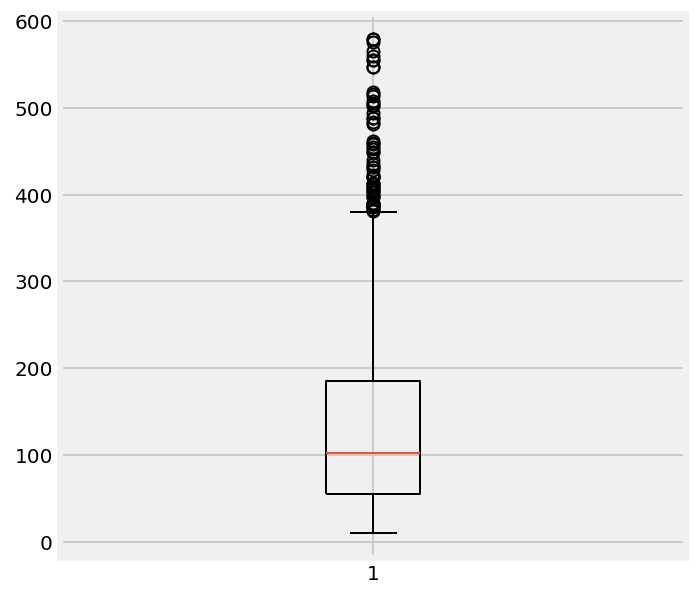

In [17]:


fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df.pre_clean_len)
plt.show()



In [18]:


from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()



In [19]:


import re

from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()

pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
part3 = r'#[A-Za-z0-9_]+'
combined_pat = r'|'.join((pat1, pat2,part3))
www_pat = r'www.[^ ]+'
url = r'URL'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def tweet_cleaner(text):
    
    try:
        bom_removed = text.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = text
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    stripped = re.sub(url, '', stripped)
    
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()



In [21]:
testing = df.review[:100]

In [22]:


test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))



In [23]:
test_result

['she should ask few native americans what their take on this is',
 'go home you re drunk',
 'amazon is investigating chinese employees who are selling internal data to third party sellers looking for an edge in the competitive marketplace',
 'someone should vetaken this piece of shit to volcano',
 'obama wanted liberals amp illegals to move into red states',
 'liberals are all kookoo',
 'oh noes tough shit',
 'was literally just talking about this lol all mass shootings like that have been set ups it propaganda used to divide us on major issues like gun control and terrorism',
 'buy more icecream',
 'canada doesn need another cuck we already have enough king up our great country',
 'it not my fault you support gun control',
 'what the difference between and one of these men admitted to groping year old girl years ago the other is going to be to the scj',
 'you are lying corrupt traitor nobody wants to hear anymore of your lies',
 'it should scare every american she is playing hockey w

In [20]:
%%time
print ("Cleaning and parsing the tweets...\n")
clean_tweet_texts = []
for i in range(0,13240):
    if( (i+1)%13240 == 0 ):
        print ("Tweets has been processed")                                                                    
    clean_tweet_texts.append(tweet_cleaner(df['review'][i]))

Cleaning and parsing the tweets...

Tweets has been processed
CPU times: user 767 ms, sys: 6.85 ms, total: 774 ms
Wall time: 775 ms


In [21]:
len(clean_tweet_texts)

13240

In [23]:



clean_df = pd.DataFrame(df.id,columns=['id'])
clean_df['text'] = clean_tweet_texts
clean_df['target'] = df.target


clean_df.head()

,id,text,target
0,86426,she should ask few native americans what their...,1
1,90194,go home you re drunk,1
2,16820,amazon is investigating chinese employees who ...,0
3,62688,someone should vetaken this piece of shit to v...,1
4,43605,obama wanted liberals amp illegals to move int...,0


In [25]:



clean_df.to_csv('train_clean.csv',index=False,encoding='utf-8')


